# Blend 008
July 12th

In [41]:
import pandas as pd
from sklearn.metrics import mean_absolute_error
import numpy as np
def group_mean_log_mae(y_true, y_pred, groups, floor=1e-9):
    maes = (y_true-y_pred).abs().groupby(groups).mean()
    return np.log(maes.map(lambda x: max(x, floor))).mean()
%matplotlib inline

In [42]:
tracking = pd.read_csv('../tracking/tracking.csv')

## 1JHC

In [43]:
# M031
# M038
# M037
# M030
tracking.sort_values('1JHC_mae_cv')[['run_id','model_number','model_type','1JHC_mae_cv']].head(8)

,run_id,model_number,model_type,1JHC_mae_cv
38,0712_2026,M046_1JHC,catboost,0.4976
34,0710_2124,M043,catboost,0.5124
36,0711_2313,M045_1JHC,catboost,0.5244
35,0711_1936,M044,catboost,0.5376
33,0709_1336,M042,catboost,0.5650
31,0708_1639,M040,catboost,0.5782
20,0702_0822,M031,catboost,0.5793
29,0707_0907,M038,catboost,0.5874


In [44]:
oofM046 = pd.read_parquet('../type_results/1JHC/M046_1JHC_0712_2026_oof_0.4976_catboost_2folds_500000iter_0.1lr.parquet')
oofM045 = pd.read_parquet('../type_results/1JHC/M045_1JHC_0711_2313_oof_0.5244_catboost_2folds_500000iter_0.1lr.parquet')

In [45]:
oofM031 = pd.read_csv('../temp/M031/temp4of8_M031_0702_0822_oof_lgb_3folds_5000000iter_0.05lr.csv')
oofM038 = pd.read_csv('../temp/M038/temp6of8_M038_0707_0907_oof_catboost_2folds_500000iter_0.08lr.csv')
oofM037 = pd.read_csv('../temp/M037/temp7of8_M037_0706_2029_oof_catboost_2folds_500000iter_0.1lr.csv')
oofM044 = pd.read_csv('../oof/M044_0711_1936_oof_catboost_2folds_1.3506CV_500000iter_0.1lr.csv')
oofM030 = pd.read_csv('../temp/M030/temp4of8_M030_0701_1302_oof_lgb_3folds_5000000iter_0.05lr.csv')
oofM030a = pd.read_csv('../temp/M030/temp4of8_M030_0701_1302_oof_lgb_3folds_5000000iter_0.05lr.csv')
oofM030b = pd.read_csv('../temp/M030/temp4of8_M030_0701_1304_oof_lgb_3folds_5000000iter_0.05lr.csv')
oofM030c = pd.read_csv('../temp/M030/temp4of8_M030_0701_1300_oof_lgb_3folds_5000000iter_0.05lr.csv')

In [46]:
oofM030['oof_preds'] = (oofM030a['oof_preds'] + oofM030b['oof_preds'] + oofM030c['oof_preds'])

In [47]:
oof_final = oofM031[['id','type','scalar_coupling_constant','oof_preds']].copy()

In [48]:
oof_final['oof_preds'] = 0

In [49]:
oof_final.loc[oof_final['type'] == '1JHC', 'oof_preds'] = (3 * oofM046['oof_preds']
                                                           + oofM031['oof_preds']
                                                           + oofM045['oof_preds']
                                                          + oofM044.loc[oofM044['type'] == '1JHC']['oof_preds']) / 6

In [50]:
# oof_final = oofM031[['id','type','scalar_coupling_constant','oof_preds']].copy()
# temp = (oofM031['oof_preds'] + oofM037['oof_preds'] + oofM038['oof_preds']
#         + oofM030['oof_preds'] + 4 * oofM044['oof_preds']) / 8
# oof_final.loc[oof_final['type'] == '1JHC', 'oof_preds'] = temp.loc[oof_final['type'] == '1JHC']
mean_absolute_error(oof_final.loc[oof_final['type'] == '1JHC']['scalar_coupling_constant'],
                    oof_final.loc[oof_final['type'] == '1JHC']['oof_preds'])

0.4546840897984628

# 2JHH

In [51]:
tracking.sort_values('2JHH_mae_cv')[['run_id','model_number','model_type','2JHH_mae_cv']].head(8)

,run_id,model_number,model_type,2JHH_mae_cv
34,0710_2124,M043,catboost,0.1382
29,0707_0907,M038,catboost,0.1405
31,0708_1639,M040,catboost,0.1421
33,0709_1336,M042,catboost,0.1428
30,0708_1415,M039,catboost,0.1440
28,0706_2029,M037,catboost,0.1440
27,0705_2317,M036,catboost,0.1499
20,0702_0822,M031,catboost,0.1543


In [52]:
oofM039 = pd.read_csv('../temp/M039/temp7of8_M039_0708_1415_oof_catboost_2folds_50000iter_0.1lr.csv')
oofM036 = pd.read_csv('../temp/M036/temp7of8_M036_0705_2317_oof_catboost_2folds_300000iter_0.1lr.csv')

In [53]:
#oof_final = oofM031[['id','type','scalar_coupling_constant','oof_preds']].copy()
temp = (oofM038['oof_preds'] + oofM039['oof_preds'] + oofM037['oof_preds'] + oofM036['oof_preds']) / 4
oof_final.loc[oof_final['type'] == '2JHH', 'oof_preds'] = temp.loc[oof_final['type'] == '2JHH']

mean_absolute_error(oof_final.loc[oof_final['type'] == '2JHH']['scalar_coupling_constant'],
                    oof_final.loc[oof_final['type'] == '2JHH']['oof_preds'])

0.12907211077881778

# 1JHN_mae_cv

In [54]:
tracking.sort_values('1JHN_mae_cv')[['run_id','model_number','model_type','1JHN_mae_cv']].head(8)

,run_id,model_number,model_type,1JHN_mae_cv
19,0701_1300,M030,lgbm,0.3582
34,0710_2124,M043,catboost,0.3764
26,0704_2344,M035,lgbm,0.3846
33,0709_1336,M042,catboost,0.3860
27,0705_2317,M036,catboost,0.3872
29,0707_0907,M038,catboost,0.3877
12,0627_1434,M024,lgbm,0.3909
31,0708_1639,M040,catboost,0.3983


In [55]:
oofM024 = pd.read_csv('../oof/M024_0627_1434_oof_lgb_2folds_-1.2826CV_500000iter_0.1lr.csv')
oofM035 = pd.read_csv('../temp/M035/temp3of8_M035_0704_2344_oof_lgbm_2folds_500000iter_0.01lr.csv')

In [56]:
oofM036.loc[oofM036['type'] == '1JHN'].head()

,id,type,scalar_coupling_constant,oof_preds
10,10,1JHN,32.6889,25.114521
13,13,1JHN,32.6891,24.865444
15,15,1JHN,32.6905,24.938599
97,97,1JHN,55.5252,51.768184
101,101,1JHN,54.7359,49.414807


In [57]:
#oof_final = oofM031[['id','type','scalar_coupling_constant','oof_preds']].copy()
temp = (oofM030['oof_preds'] + oofM035['oof_preds'] + oofM036['oof_preds'] + oofM038['oof_preds']) / 4 # + oofM024['oof_preds']) / 5
oof_final.loc[oof_final['type'] == '1JHN', 'oof_preds'] = temp.loc[oof_final['type'] == '1JHN']
mean_absolute_error(oof_final.loc[oof_final['type'] == '1JHN']['scalar_coupling_constant'],
                    oof_final.loc[oof_final['type'] == '1JHN']['oof_preds'])

0.3151774321601402

# 2JHN_mae_cv

In [58]:
tracking.sort_values('2JHN_mae_cv')[['run_id','model_number','model_type','2JHN_mae_cv']].head(8)

,run_id,model_number,model_type,2JHN_mae_cv
20,0702_0822,M031,catboost,0.1300
29,0707_0907,M038,catboost,0.1382
19,0701_1300,M030,lgbm,0.1396
13,0629_1311,M025,catboost,0.1398
22,0703_2133,M032,catboost,0.1406
28,0706_2029,M037,catboost,0.1419
31,0708_1639,M040,catboost,0.1435
30,0708_1415,M039,catboost,0.1435


In [59]:
oofM025 = pd.read_csv('../oof/M025_0629_1311_oof_lgb_2folds_-1.3265CV_500000iter_0.1lr.csv')

In [60]:
#oof_final = oofM031[['id','type','scalar_coupling_constant','oof_preds']].copy()
temp = (oofM031['oof_preds'] + oofM038['oof_preds'] + oofM030['oof_preds'] + oofM025['oof_preds']) / 4
oof_final.loc[oof_final['type'] == '2JHN', 'oof_preds'] = temp.loc[oof_final['type'] == '2JHN']
mean_absolute_error(oof_final.loc[oof_final['type'] == '2JHN']['scalar_coupling_constant'],
                    oof_final.loc[oof_final['type'] == '2JHN']['oof_preds'])

0.11556027662764612

## 2JHC_mae_cv

In [61]:
tracking.sort_values('2JHC_mae_cv')[['run_id','model_number','model_type','2JHC_mae_cv']].head(8)

,run_id,model_number,model_type,2JHC_mae_cv
41,0713_0745,M046_2JHC,catboost,0.1957
34,0710_2124,M043,catboost,0.2137
31,0708_1639,M040,catboost,0.2191
28,0706_2029,M037,catboost,0.2255
30,0708_1415,M039,catboost,0.2342
32,0708_1847,M041,lgbm,0.2348
27,0705_2317,M036,catboost,0.2771
22,0703_2133,M032,catboost,0.2866


In [62]:
oofM040 = pd.read_csv('../temp/M040/temp2of8_M040_0708_1639_oof_catboost_2folds_500000iter_0.1lr.csv')

In [63]:
oofM046_2JHC = pd.read_parquet('../type_results/2JHC/M046_2JHC_0713_0745_oof_0.1957_catboost_2folds_500000iter_0.1lr.parquet')

In [64]:
oof_final.loc[oof_final['type'] == '2JHC', 'oof_preds'] = (oofM040['oof_preds']
                                                           + oofM037['oof_preds']
                                                           + 3 * oofM046_2JHC.loc[oofM044['type'] == '2JHC']['oof_preds']) / 5

In [65]:
mean_absolute_error(oof_final.loc[oof_final['type'] == '2JHC']['scalar_coupling_constant'],
                    oof_final.loc[oof_final['type'] == '2JHC']['oof_preds'])

0.18390580192875494

# 3JHH_mae_cv

In [66]:
tracking.sort_values('3JHH_mae_cv')[['run_id','model_number','model_type','3JHH_mae_cv']].head(8)

,run_id,model_number,model_type,3JHH_mae_cv
29,0707_0907,M038,catboost,0.1498
31,0708_1639,M040,catboost,0.1500
33,0709_1336,M042,catboost,0.1525
28,0706_2029,M037,catboost,0.1537
30,0708_1415,M039,catboost,0.1539
34,0710_2124,M043,catboost,0.1552
27,0705_2317,M036,catboost,0.1828
13,0629_1311,M025,catboost,0.1934


In [67]:
#oof_final = oofM031[['id','type','scalar_coupling_constant','oof_preds']].copy()
temp = (oofM038['oof_preds'] + oofM037['oof_preds'] + oofM039['oof_preds']) / 3 #+ oofM036['oof_preds'] + oofM025['oof_preds']) / 5
oof_final.loc[oof_final['type'] == '3JHH', 'oof_preds'] = temp.loc[oof_final['type'] == '3JHH']
mean_absolute_error(oof_final.loc[oof_final['type'] == '3JHH']['scalar_coupling_constant'],
                    oof_final.loc[oof_final['type'] == '3JHH']['oof_preds'])

0.1367999088241809

# 3JHC
3JHN_mae_cv

In [68]:
tracking.sort_values('3JHC_mae_cv')[['run_id','model_number','model_type','n_fold','3JHC_mae_cv']].head(8)

,run_id,model_number,model_type,n_fold,3JHC_mae_cv
43,0713_1412,M046_3JHC,catboost,2.0,0.2216
37,0712_0222,M045_3JHC,catboost,2.0,0.2409
33,0709_1336,M042,catboost,2.0,0.2458
31,0708_1639,M040,catboost,2.0,0.2459
34,0710_2124,M043,catboost,2.0,0.2462
28,0706_2029,M037,catboost,2.0,0.2650
30,0708_1415,M039,catboost,2.0,0.2672
27,0705_2317,M036,catboost,2.0,0.3759


In [69]:
oofM045 = pd.read_parquet('../type_results/3JHC/M045_3JHC_0712_0222_oof_0.2409_catboost_2folds_500000iter_0.1lr.parquet')
oofM046 = pd.read_parquet('../type_results/3JHC/M046_3JHC_0713_1412_oof_0.2216_catboost_2folds_500000iter_0.1lr.parquet')

In [71]:
oofM042 = pd.read_csv('../oof/M042_0709_1336_oof_catboost_2folds_-0.9447CV_500000iter_0.1lr.csv')

In [82]:
oof_final.loc[oof_final['type'] == '3JHC', 'oof_preds'] = (oofM045['oof_preds']
                                                           + 3 * oofM046['oof_preds']
                                                           + oofM042.loc[oofM042['type'] == '3JHC']['oof_preds']) / 5

In [83]:
mean_absolute_error(oof_final.loc[oof_final['type'] == '3JHC']['scalar_coupling_constant'],
                    oof_final.loc[oof_final['type'] == '3JHC']['oof_preds'])

0.20555800406175845

# 3JHN_mae_cv

In [84]:
tracking.sort_values('3JHN_mae_cv')[['run_id','model_number','model_type','3JHN_mae_cv']].head(8)

,run_id,model_number,model_type,3JHN_mae_cv
29,0707_0907,M038,catboost,0.1147
31,0708_1639,M040,catboost,0.1158
30,0708_1415,M039,catboost,0.1160
28,0706_2029,M037,catboost,0.1176
34,0710_2124,M043,catboost,0.1199
32,0708_1847,M041,lgbm,0.1241
13,0629_1311,M025,catboost,0.1627
22,0703_2133,M032,catboost,0.1647


In [85]:
oofM041 = pd.read_csv('../temp/M041/temp1of8_M041_0708_1847_oof_lgbm_2folds_300000iter_0.1lr.csv')

In [86]:
#oof_final = oofM031[['id','type','scalar_coupling_constant','oof_preds']].copy()
temp = (oofM038['oof_preds'] + oofM040['oof_preds'] + oofM039['oof_preds'] + oofM037['oof_preds'] + oofM041['oof_preds']) / 5
oof_final.loc[oof_final['type'] == '3JHN', 'oof_preds'] = temp.loc[oof_final['type'] == '3JHN']
mean_absolute_error(oof_final.loc[oof_final['type'] == '3JHN']['scalar_coupling_constant'],
                    oof_final.loc[oof_final['type'] == '3JHN']['oof_preds'])

0.10460838260197436

# OVERALL OOF SCORE

In [87]:
for i, d in oof_final.groupby('type'):
    print(i)
    print(mean_absolute_error(d['scalar_coupling_constant'], d['oof_preds']))

1JHC
0.4546840897984628
1JHN
0.3151774321601402
2JHC
0.18390580192875494
2JHH
0.12907211077881778
2JHN
0.11556027662764612
3JHC
0.20555800406175845
3JHH
0.1367999088241809
3JHN
0.10460838260197436


In [88]:
oof_final['oof_preds'] = pd.to_numeric(oof_final['oof_preds'])

In [89]:
group_mean_log_mae(oof_final['scalar_coupling_constant'], oof_final['oof_preds'], oof_final['type'])

-1.708780641233174

# Read Submission files

In [90]:
test = pd.read_csv('../input/test.csv')

In [91]:
test.head()

,id,molecule_name,atom_index_0,atom_index_1,type
0,4658147,dsgdb9nsd_000004,2,0,2JHC
1,4658148,dsgdb9nsd_000004,2,1,1JHC
2,4658149,dsgdb9nsd_000004,2,3,3JHH
3,4658150,dsgdb9nsd_000004,3,0,1JHC
4,4658151,dsgdb9nsd_000004,3,1,2JHC


In [92]:
ss = test[['id','type']].copy()
ss['scalar_coupling_constant'] = 0

In [93]:
subM024 = pd.read_csv('../submissions/M024_0627_1434_submission_lgb_2folds_-1.2826CV_500000iter_0.1lr.csv')
subM025 = pd.read_csv('../submissions/M025_0629_1311_submission_lgb_2folds_-1.3265CV_500000iter_0.1lr.csv')
subM026 = pd.read_csv('../submissions/M026_COMBINED_submission_lgb_2folds_-1.2198CV_500000iter_0.1lr.csv')
subM027 = pd.read_csv('../submissions/M027_0629_2221_submission_lgb_2folds_-1.2683CV_500000iter_0.1lr.csv')
subM028 = pd.read_csv('../submissions/M028_0630_1258_submission_lgb_2folds_-1.2487CV_5000000iter_0.1lr.csv')
subM029 = pd.read_csv('../submissions/M029_0701_0819_submission_lgb_2folds_-1.2437CV_5000000iter_0.1lr.csv')
subM030a = pd.read_csv('../temp/M030/temp4of8_M030_0701_1302_submission_lgb_3folds_5000000iter_0.05lr.csv')
subM030b = pd.read_csv('../temp/M030/temp4of8_M030_0701_1304_submission_lgb_3folds_5000000iter_0.05lr.csv')
subM030c = pd.read_csv('../temp/M030/temp4of8_M030_0701_1300_submission_lgb_3folds_5000000iter_0.05lr.csv')
subM044 = pd.read_csv('../submissions/M044_0711_1936_submission_lgb_2folds_1.3506CV_500000iter_0.1lr.csv')
subM030 = subM030a.copy()
subM030['scalar_coupling_constant'] = (subM030a['scalar_coupling_constant'] + subM030b['scalar_coupling_constant'] + subM030c['scalar_coupling_constant']) / 3
subM031 = pd.read_csv('../temp/M031/temp4of8_M031_0702_0822_submission_lgb_3folds_5000000iter_0.05lr.csv')
subM032 = pd.read_csv('../temp/M032/temp7of8_M032_0703_2133_submission_lgb_3folds_5000000iter_0.1lr.csv')
subM035 = pd.read_csv('../temp/M035/temp3of8_M035_0704_2344_submission_lgbm_2folds_500000iter_0.01lr.csv')

subM031 = pd.read_csv('../temp/M031/temp4of8_M031_0702_0822_submission_lgb_3folds_5000000iter_0.05lr.csv')
subM037 = pd.read_csv('../submissions/M037_0706_2029_submission_lgb_2folds_-1.5106CV_500000iter_0.1lr.csv')
subM038 = pd.read_csv('../temp/M038/temp6of8_M038_0707_0907_submission_catboost_2folds_500000iter_0.08lr.csv')
subM039 = pd.read_csv('../submissions/M039_0708_1415_submission_lgb_2folds_-1.4994CV_50000iter_0.1lr.csv')
subM036 = pd.read_csv('../submissions/M036_0705_2317_submission_lgb_2folds_-1.3767CV_300000iter_0.1lr.csv')

subM040 = pd.read_csv('../temp/M040/temp2of8_M040_0708_1639_submission_catboost_2folds_500000iter_0.1lr.csv')
subM041 = pd.read_csv('../temp/M041/temp1of8_M041_0708_1847_submission_lgbm_2folds_300000iter_0.1lr.csv')

In [97]:
subM046_1JHC = pd.read_parquet('../type_results/1JHC/M046_1JHC_0712_2026_sub_0.4976_catboost_2folds_500000iter_0.1lr.parquet')

In [98]:
subM044 = pd.read_parquet('../type_results/1JHC/M044_0711_1936_sub_0.5376_catboost_2folds_500000iter_0.1lr.parquet')

In [101]:
subM045_1JHC = pd.read_parquet('../type_results/1JHC/M045_1JHC_0711_2313_sub_0.5244_catboost_2folds_500000iter_0.1lr.parquet')

In [102]:
subM046_3JHC = pd.read_parquet('../type_results/3JHC/M046_3JHC_0713_1412_sub_0.2216_catboost_2folds_500000iter_0.1lr.parquet')
subM045_3JHC = pd.read_parquet('../type_results/3JHC/M045_3JHC_0712_0222_sub_0.2409_catboost_2folds_500000iter_0.1lr.parquet')

In [107]:
subM042 = pd.read_csv('../submissions/M042_0709_1336_submission_lgb_2folds_-0.9447CV_500000iter_0.1lr.csv')

In [119]:
subM046_2JHC = pd.read_parquet('../type_results/2JHC/M046_2JHC_0713_0745_sub_0.1957_catboost_2folds_500000iter_0.1lr.parquet')

In [122]:
subM037.head()

,id,scalar_coupling_constant
0,4658147,13.884890
1,4658148,164.345838
2,4658149,7.481856
3,4658150,167.389506
4,4658151,14.087441


In [123]:
# 1JHC
ss.loc[ss['type'] == '1JHC', 'scalar_coupling_constant'] = (3 * subM046_1JHC['prediction']
                                                           + subM031['scalar_coupling_constant']
                                                           + subM045_1JHC['prediction']
                                                          + subM044.loc[subM044['type'] == '1JHC']['prediction']) / 6

# 2JHH
#temp = (oofM038['oof_preds'] + oofM039['oof_preds'] + oofM037['oof_preds'] + oofM036['oof_preds']) / 4
temp = (subM038['scalar_coupling_constant'] + subM039['scalar_coupling_constant'] + subM037['scalar_coupling_constant'] + subM036['scalar_coupling_constant']) / 4
ss.loc[ss['type'] == '2JHH', 'scalar_coupling_constant'] = temp.loc[ss['type'] == '2JHH']
# 1JHN
#temp = (oofM030['oof_preds'] + oofM035['oof_preds'] + oofM036['oof_preds'] + oofM038['oof_preds']) / 4
temp = (subM030['scalar_coupling_constant'] + subM035['scalar_coupling_constant'] + subM036['scalar_coupling_constant'] + subM038['scalar_coupling_constant']) / 4
ss.loc[ss['type'] == '1JHN', 'scalar_coupling_constant'] = temp.loc[ss['type'] == '1JHN']
# 2JHN
#temp = (oofM031['oof_preds'] + oofM038['oof_preds'] + oofM030['oof_preds'] + oofM025['oof_preds']) / 4
temp = (subM031['scalar_coupling_constant'] + subM038['scalar_coupling_constant'] + subM030['scalar_coupling_constant'] + subM025['scalar_coupling_constant']) / 4
ss.loc[ss['type'] == '2JHN', 'scalar_coupling_constant'] = temp.loc[ss['type'] == '2JHN']
# 2JHC
#temp = (oofM040['oof_preds'] + oofM037['oof_preds']) / 2
ss.loc[ss['type'] == '2JHC', 'scalar_coupling_constant'] = (subM040['scalar_coupling_constant']
                                                           + subM037['scalar_coupling_constant']
                                                           + 3 * subM046_2JHC.loc[subM046_2JHC['type'] == '2JHC']['prediction']) / 5
# 3JHH
#temp = (oofM038['oof_preds'] + oofM037['oof_preds'] + oofM039['oof_preds']) / 3
temp = (subM038['scalar_coupling_constant'] + subM037['scalar_coupling_constant'] + subM039['scalar_coupling_constant']) / 3
ss.loc[ss['type'] == '3JHH', 'scalar_coupling_constant'] = temp.loc[ss['type'] == '3JHH']
# 3JHC
# temp = (oofM037['oof_preds'] + oofM039['oof_preds']) / 2 # + oofM036['oof_preds']) / 3
ss.loc[ss['type'] == '3JHC', 'scalar_coupling_constant'] = (subM045_3JHC['prediction']
                                             + 3 * subM046_3JHC['prediction']
                                             + subM042.loc[ss['type'] == '3JHC']['scalar_coupling_constant']) / 5

# temp = (subM037['scalar_coupling_constant'] + subM039['scalar_coupling_constant'] + subM036['scalar_coupling_constant']) / 3
# ss.loc[ss['type'] == '3JHC', 'scalar_coupling_constant'] = temp.loc[ss['type'] == '3JHC']
# 3JHN
#temp = (oofM038['oof_preds'] + oofM040['oof_preds'] + oofM039['oof_preds'] + oofM037['oof_preds'] + oofM041['oof_preds']) / 5
temp = (subM038['scalar_coupling_constant'] + subM040['scalar_coupling_constant'] + subM039['scalar_coupling_constant'] + subM037['scalar_coupling_constant'] + subM041['scalar_coupling_constant']) / 5
ss.loc[ss['type'] == '3JHN', 'scalar_coupling_constant'] = temp.loc[ss['type'] == '3JHN']


In [124]:
ss['scalar_coupling_constant_good'] = subM025['scalar_coupling_constant']

In [125]:
ss[['scalar_coupling_constant','scalar_coupling_constant_good']].corr()

,scalar_coupling_constant,scalar_coupling_constant_good
scalar_coupling_constant,1.000000,0.999928
scalar_coupling_constant_good,0.999928,1.000000


In [130]:
oof_final['oof_good'] = oofM025['oof_preds']
oof_final[['oof_preds','oof_good']].corr()

,oof_preds,oof_good
oof_preds,1.000000,0.999907
oof_good,0.999907,1.000000


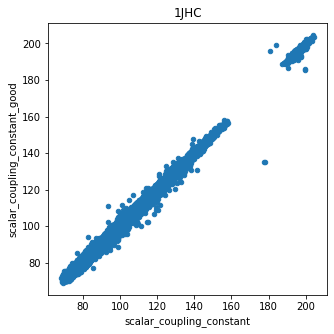

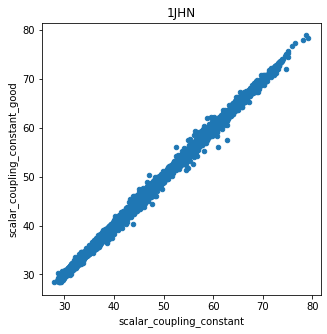

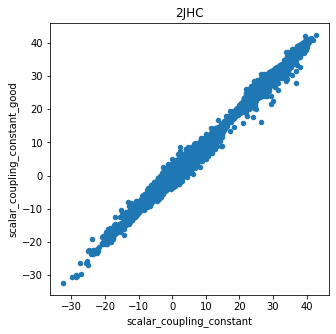

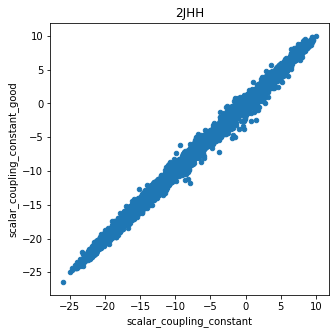

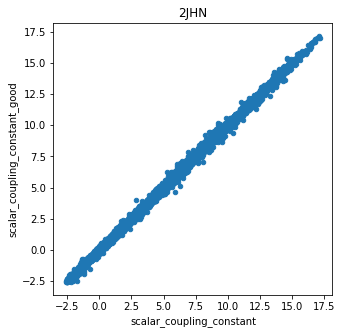

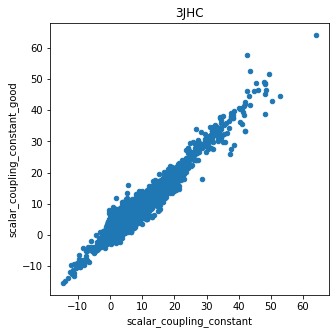

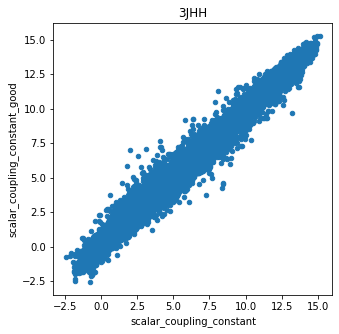

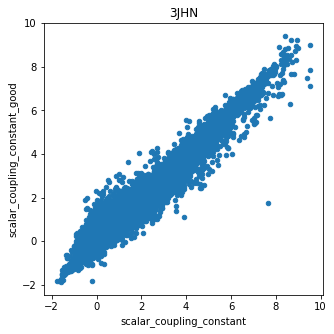

In [131]:
import matplotlib.pylab as plt
for i, d in ss.groupby('type'):
    d.plot(x='scalar_coupling_constant', y='scalar_coupling_constant_good', kind='scatter', figsize=(5, 5), title=i)
    plt.show()

In [132]:
ss[['id','scalar_coupling_constant']].to_csv('../submissions/BLEND008_submission_-1.7087CV_Jul14best.csv', index=False)

In [133]:
ss.head()

,id,type,scalar_coupling_constant,oof_preds,scalar_coupling_constant_good
0,4658147,2JHC,14.790462,NaN,8.873624
1,4658148,1JHC,177.894415,NaN,134.914493
2,4658149,3JHH,7.272819,NaN,3.716820
3,4658150,1JHC,177.320175,NaN,134.914493
4,4658151,2JHC,14.423374,NaN,8.873624


In [134]:
oof_final.to_csv('../oof/BLEND008_oof_-1.7087CV_Jul14best.csv')